In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/Cleaned_Data/Cleaned_Data.csv')
df.head()

,category,brand,description,details,is_fassured,rating,discount (%),price,mrp,num_ratings,num_reviews,timestamp
0,Air Conditioner,Midea,Midea 1 Ton 3 Star Split AC - White,Condenser Coil: CopperPower Consumption: 980 W...,1,4.2,48.0,20499.0,39600.0,15595.0,2685.0,2019-08-14 23:49:25.955540
1,Air Conditioner,Voltas,Voltas 1.5 Ton 3 Star Split AC - White,Condenser Coil: CopperPower Consumption: 1450 ...,1,4.2,45.0,28499.0,51990.0,5325.0,549.0,2019-08-14 23:49:25.956537
2,Air Conditioner,MarQ by Flipkart,MarQ by Flipkart 1.5 Ton 3 Star Split Inverter...,Condenser Coil: CopperPower Consumption: 1650 ...,1,4.2,46.0,24999.0,46999.0,10058.0,1676.0,2019-08-14 23:49:25.957534
3,Air Conditioner,Voltas,Voltas 1.5 Ton 3 Star Split Inverter AC - White,Condenser Coil: CopperPower Consumption: 1750 ...,1,4.2,42.0,31999.0,55990.0,4423.0,453.0,2019-08-14 23:49:25.959529
4,Air Conditioner,Voltas,Voltas 1.2 Ton 5 Star Split Inverter AC - White,Condenser Coil: CopperPower Consumption: 1010 ...,1,4.1,43.0,30999.0,54990.0,3146.0,478.0,2019-08-14 23:49:25.960526


In [3]:
df.isnull().sum()

category            0
brand               0
description         0
details         20501
is_fassured         0
rating              0
discount (%)        0
price               0
mrp                 0
num_ratings         0
num_reviews     20501
timestamp           0
dtype: int64

# Some Descriptive Statistics

## 1. Category wise describing rating, no. of ratings and no. of reviews.

### Describing category-wise rating

In [4]:
# Excluding 0 in rating column, as 0 means no rating has been given to the product. The rating has values in range 1 to 5.

rating_stats = df[df['rating'] != 0][['category', 'rating']].groupby('category').describe()['rating']
modes = []
for i,j in df[df['rating'] != 0][['category', 'rating']].groupby('category')['rating']:
    modes.append(j.mode().values)
    
rating_stats['mode'] = modes
rating_stats

,count,mean,std,min,25%,50%,75%,max,mode
category,,,,,,,,,
Air Conditioner,177.0,4.198305,0.253493,2.7,4.1,4.2,4.300,5.0,[4.2]
Automation and Robotics,496.0,3.651210,0.604193,1.0,3.3,3.7,4.000,5.0,[3.3]
Camera,349.0,3.373066,0.970020,1.0,2.8,3.2,4.300,5.0,[3.0]
Camera_Accessories,621.0,3.812721,0.530261,1.2,3.5,3.8,4.200,5.0,[3.5]
Computer Accessories,1703.0,4.029771,0.417072,1.0,3.8,4.1,4.300,5.0,[4.2]
Computer Peripherals,1692.0,4.002660,0.437358,1.0,3.7,4.0,4.300,5.0,[4.3]
Desktop PCs,186.0,3.315054,0.839491,1.0,3.0,3.3,3.875,5.0,[3.2]
Health and Personal Care,1427.0,3.851647,0.536588,1.0,3.6,4.0,4.200,5.0,[4.0]
Home Appliances,1636.0,4.081296,0.353841,1.3,3.9,4.1,4.300,5.0,[4.2]


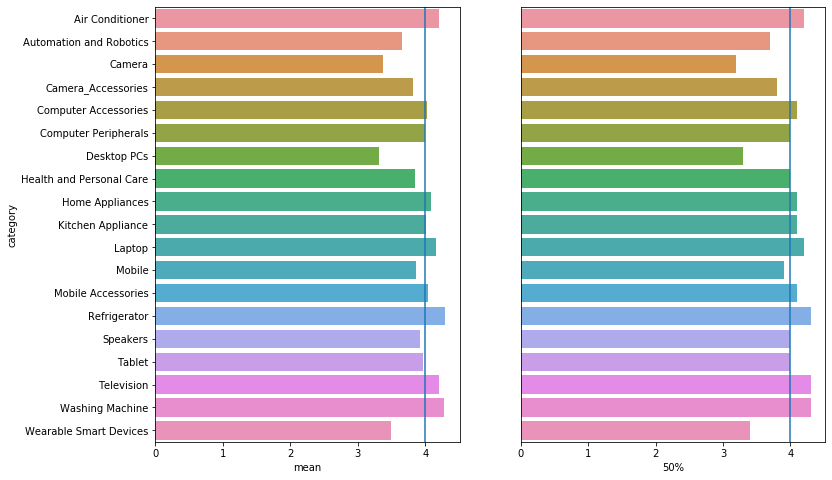

In [5]:
fig,ax = plt.subplots(1,2,figsize = (12,8))
sns.barplot(x = rating_stats['mean'], y = rating_stats.index, ax = ax[0], orient = 'h')
sns.barplot(x = rating_stats['50%'], y = rating_stats.index, ax = ax[1], orient = 'h')
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[0].axvline(x = 4)
ax[1].axvline(x = 4)
plt.show()

<h3> Following electronic categories are performing well in terms of rating value, as there rating on average is greater tha 4: </h3> <br>
- Air Conditioners &emsp;- Computer Accessories &emsp;- Computer Peripherals &emsp; - Home Appliances &emsp;- Kitchen Appliances &emsp;- Laptops &emsp;- Mobile Accessories &emsp;- Refrigerators &emsp;- Televisions &emsp;- Washing Machines

### Describing category-wise no. of ratings

In [6]:
# Excluding 0 in num_rating column, as it implies there is no rating for that product.

num_rating_stats = df[df['num_ratings'] != 0][['category', 'num_ratings']].groupby('category').describe()['num_ratings']
modes = []
for i,j in df[df['num_ratings'] != 0][['category', 'num_ratings']].groupby('category')['num_ratings']:
    modes.append(j.mode().values)
    
num_rating_stats['mode'] = modes
num_rating_stats

,count,mean,std,min,25%,50%,75%,max,mode
category,,,,,,,,,
Air Conditioner,177.0,1312.423729,2680.978088,3.0,40.00,182.0,1187.00,15595.0,[4.0]
Automation and Robotics,496.0,195.945565,1768.129580,1.0,4.00,10.0,29.00,34848.0,[4.0]
Camera,349.0,439.194842,2481.262259,1.0,4.00,13.0,41.00,37478.0,[3.0]
Camera_Accessories,621.0,229.267311,942.588811,1.0,8.00,28.0,84.00,14380.0,[3.0]
Computer Accessories,1703.0,555.696418,2728.945314,1.0,16.00,75.0,287.00,73378.0,[3.0]
Computer Peripherals,1692.0,336.568558,1792.621585,1.0,13.00,54.0,196.00,50395.0,[3.0]
Desktop PCs,186.0,34.682796,71.560909,1.0,4.00,12.0,27.00,669.0,[3.0]
Health and Personal Care,1427.0,2897.674842,14041.144145,1.0,22.00,163.0,847.00,226918.0,[3.0]
Home Appliances,1636.0,1584.837408,6624.952349,1.0,29.00,135.5,818.25,104909.0,[3.0]


<h3>If we consider number of ratings as the minimum number of customers who bought the product, we can infer the following : </h3><br>
- We can see that mobiles are the top most selling electronic category, as it has highest number of mean ratings. <br>
- Also, we can see that there is a lot of difference in minimum & maximum number of ratings and mean, median for each category is also showing large difference. It implies that there are some products in each category that were sold in very large quantities and are popular among users, while on the other hand some products were sold in very less quantity and are not popular among users. <br><br>
<b>Let's quickly check what are the products that has maximum number of ratings.</b>

In [7]:
df[df['num_ratings'].isin(num_rating_stats['max'].values)][['category', 'brand', 'description', 'num_ratings']]

,category,brand,description,num_ratings
0,Air Conditioner,Midea,Midea 1 Ton 3 Star Split AC - White,15595.0
14,Air Conditioner,Midea,Midea 1.5 Ton 3 Star Split AC - White,15595.0
30,Air Conditioner,Midea,Midea 2 Ton 3 Star Split AC - White,15595.0
214,Automation and Robotics,Google,Google Home Mini,34848.0
2216,Camera,Canon,Canon EOS 1300D DSLR Camera Body with Single L...,37478.0
3316,Camera_Accessories,Oxhox,Oxhox Tripod-3110 Portable Adjustable Aluminum...,14380.0
3421,Camera_Accessories,Biratty,Biratty 3110 tripod digital camera stand Monopod,669.0
5317,Computer Accessories,JioFi,JioFi M2S Wireless Data Card,50395.0
5318,Computer Accessories,Logitech,Logitech B175 Wireless Optical Mouse,73378.0
7315,Computer Peripherals,JioFi,JioFi M2S Wireless Data Card,50395.0


We can see from above table that <b>Redmi Note 5 Pro (Gold & Black, 64 GB)</b> was sold in largest quantity and is extremely popular among users. <br>
We will check top most selling products in their respective categories later.

### Describing category-wise no. of reviews

In [8]:
# Excluding 0 in num_reviews column, as it implies there is no review for that product.

num_review_stats = df[df['num_reviews'] != 0][['category', 'num_reviews']].groupby('category').describe()['num_reviews']
modes = []
for i,j in df[df['num_reviews'] != 0][['category', 'num_reviews']].groupby('category')['num_reviews']:
    modes.append(j.mode(dropna = False).values)
    
num_review_stats['mode'] = modes
num_review_stats.dropna()

,count,mean,std,min,25%,50%,75%,max,mode
category,,,,,,,,,
Air Conditioner,163.0,231.159509,472.954086,1.0,10.0,34.0,276.5,2685.0,[2.0]
Camera,303.0,91.597360,490.356752,1.0,1.0,3.0,10.5,7072.0,[1.0]
Laptop,375.0,103.610667,276.967378,1.0,4.0,16.0,74.5,2580.0,[1.0]
Mobile,932.0,2298.605150,8955.880201,1.0,9.0,75.5,801.5,121797.0,[1.0]
Refrigerator,357.0,175.596639,403.383526,1.0,3.0,22.0,124.0,2677.0,[1.0]
Tablet,437.0,201.610984,418.335073,1.0,13.0,50.0,198.0,2812.0,[65.0]
Television,625.0,507.603200,1349.269029,1.0,2.0,13.0,106.0,9690.0,[2.0]
Washing Machine,333.0,153.912913,380.117485,1.0,7.0,29.0,132.0,3600.0,[1.0]


Again from above table, we can see that Mobiles are having highest number of ratings, which further supports the fact that mobiles are most popular and highest selling electronic category.

## 2. Category wise checking fAssured products percentage.

In [9]:
f_assured_count = df[['category', 'is_fassured']].groupby('category').sum()/df[['category', 'is_fassured']].groupby('category').count() * 100
f_assured_count.rename(columns = {'is_fassured' : '% fAssured products'}, inplace = True)
f_assured_count.sort_values(by = '% fAssured products', ascending = False)

,% fAssured products
category,
Air Conditioner,100.000000
Mobile Accessories,89.850000
Washing Machine,73.474178
Television,72.523962
Tablet,55.060729
Mobile,52.916667
Laptop,50.656660
Refrigerator,50.270270
Home Appliances,50.100000


## 3. Category wise describing discount, price and mrp.

In [10]:
len(df[df['mrp'] == 0]) == len(df[(df['mrp'] == 0) & (df['discount (%)'] == 0)])

True

In [11]:
# mrp column has values as 0, which implies that there is no discount(0 %) on that product. So, we replace 0 in mrp 
# column with its corresponding price

df['mrp'] = df[['mrp', 'price']].apply(lambda x : x[1] if x[0] == 0 else x[0], axis = 1)
len(df[df['mrp'] == 0]) , df['mrp'].isnull().sum()


# Note : We have 0 price for 2 products, which means they are either out of stock or not captured during scraping.

(2, 0)

### Describing category-wise discount %.

In [12]:
# Excluding 0 in discount % column, as we want to summarize the products who has some discount on it and including 0 will 
# affect the values.

discount_stats = df[['category', 'discount (%)']].groupby('category').describe()['discount (%)']
modes = []
for i,j in df[['category', 'discount (%)']].groupby('category')['discount (%)']:
    modes.append(j.mode(dropna = False).values)

discount_stats['mode'] = modes

# Let's also check percentage of products having no discount in each category.
no_discount = df[df['discount (%)'] == 0][['category', 'discount (%)']].groupby('category').count() / df[['category', 'discount (%)']].groupby('category').count() * 100
discount_stats['no_discount_percent'] = no_discount

discount_stats

,count,mean,std,min,25%,50%,75%,max,mode,no_discount_percent
category,,,,,,,,,,
Air Conditioner,210.0,26.557143,11.546829,0.0,18.25,27.0,35.0,48.0,[35.0],2.857143
Automation and Robotics,2000.0,45.245000,16.918218,0.0,35.00,44.0,55.0,87.0,[35.0],1.150000
Camera,1104.0,42.446558,22.601817,0.0,23.00,45.0,60.0,88.0,[19.0],4.528986
Camera_Accessories,2000.0,61.020000,19.259805,0.0,52.00,65.0,77.0,88.0,[56.0],1.000000
Computer Accessories,2000.0,47.459500,20.385292,0.0,32.00,50.0,62.0,87.0,[50.0],2.200000
Computer Peripherals,2000.0,48.591500,21.838729,0.0,33.00,52.0,65.0,88.0,[50.0],4.600000
Desktop PCs,520.0,26.953846,18.549673,0.0,12.00,25.0,41.0,79.0,[0.0],8.461538
Health and Personal Care,2000.0,57.929000,21.743191,0.0,42.00,62.0,75.0,88.0,[85.0],0.500000
Home Appliances,2000.0,33.608500,19.999505,0.0,18.00,29.0,47.0,86.0,[29.0],1.750000


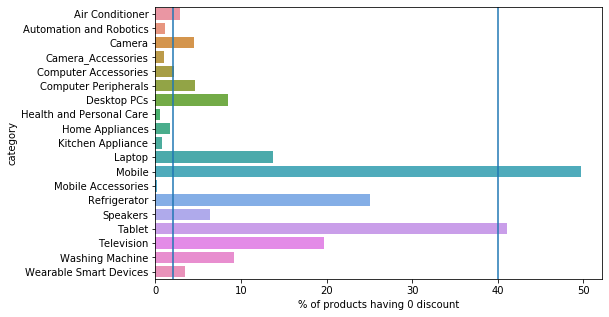

In [13]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'no_discount_percent', y = 'category', data = discount_stats.reset_index(), orient = 'h')
plt.xlabel('% of products having 0 discount')
plt.axvline(x = 40)
plt.axvline(x = 2)
plt.show()

- We can see that <b>Mobiles</b> and <b> Tablets </b> show highest percentage of no discounted products. <br><br>
- The following categories have large number of products selling on discounted price as compared to others and discounts offered were pretty good: <br>
.- <b>Automation & Robotics</b> &emsp; .- <b>Camera_Accessories</b> &emsp; .- <b>Health & Personal Care</b> &emsp; .- <b>Kitchen Appliances</b> &emsp; .-<b>Home Appliances</b> &emsp; .- <b>Mobile Accessories</b>

### Describing category-wise price.

In [14]:
price_stats = df[df['price'] != 0][['category', 'price']].groupby('category').describe()['price']
modes = []
for i,j in df[df['price'] != 0][['category', 'price']].groupby('category')['price']:
    modes.append(j.mode(dropna = False).values)

price_stats['mode'] = modes
price_stats

,count,mean,std,min,25%,50%,75%,max,mode
category,,,,,,,,,
Air Conditioner,210.0,35140.147619,8464.288662,19499.0,29011.50,34302.5,39999.00,65485.0,"[24999.0, 31999.0, 32999.0, 39999.0]"
Automation and Robotics,2000.0,8210.071500,7741.517116,95.0,1650.00,5850.0,13285.00,61500.0,[1899.0]
Camera,1103.0,10403.029012,29391.580529,623.0,999.00,1999.0,5199.00,267999.0,[2199.0]
Camera_Accessories,2000.0,504.157000,1109.819412,89.0,275.00,345.0,379.00,26200.0,[349.0]
Computer Accessories,2000.0,521.442500,644.854627,69.0,199.00,299.0,599.00,10700.0,[199.0]
Computer Peripherals,2000.0,768.350000,1982.380014,60.0,200.00,299.0,549.00,26999.0,[199.0]
Desktop PCs,520.0,28771.226923,34755.146392,1700.0,8741.00,17999.0,32846.75,289990.0,[6999.0]
Health and Personal Care,2000.0,821.413000,1529.831272,40.0,249.00,379.0,791.00,11999.0,[299.0]
Home Appliances,2000.0,5705.497500,9120.074853,75.0,449.00,1399.0,6999.00,69990.0,[1399.0]


<b> Laptops </b>, <b> Televisions </b> and <b> Air Conditioners </b> are the categories having costliest products.

### Describing category-wise mrp.

In [15]:
mrp_stats = df[df['mrp'] != 0][['category', 'mrp']].groupby('category').describe()['mrp']
modes = []
for i,j in df[df['mrp'] != 0][['category', 'mrp']].groupby('category')['mrp']:
    modes.append(j.mode(dropna = False).values)

mrp_stats['mode'] = modes
mrp_stats

,count,mean,std,min,25%,50%,75%,max,mode
category,,,,,,,,,
Air Conditioner,210.0,48644.823810,10575.719236,25000.0,41547.50,48945.0,55990.00,76600.0,[45000.0]
Automation and Robotics,2000.0,14097.254000,11571.112909,159.0,3999.00,9999.0,22848.25,100000.0,[4999.0]
Camera,1103.0,13664.151405,33961.796895,999.0,2899.00,3999.0,6499.00,300950.0,[2999.0]
Camera_Accessories,2000.0,1319.342500,1570.952256,150.0,799.00,999.0,1500.00,32990.0,[999.0]
Computer Accessories,2000.0,994.581500,938.485542,103.0,499.00,699.0,1299.00,10700.0,[499.0]
Computer Peripherals,2000.0,1392.231000,2583.179542,95.0,499.00,700.0,1250.00,39999.0,[499.0]
Desktop PCs,520.0,36785.144231,38669.825317,2999.0,15999.00,26386.5,39999.00,341990.0,[9999.0]
Health and Personal Care,2000.0,1810.128500,2611.202893,155.0,815.00,1199.0,1999.00,38000.0,[999.0]
Home Appliances,2000.0,8081.898500,12697.075636,150.0,799.00,1995.0,11007.50,105000.0,[999.0]


In terms of mrp also, <b> Laptops </b>, <b> Televisions </b> and <b> Air Conditinoers </b> are the categories having costliest products.

The above analysis gives an overview towards the behaviour of different categories based on the following parameters : <br>
<b>Ratings &emsp; Number of ratings &emsp; Number of reviews &emsp; fAssured &emsp; discount &emsp; price &emsp; mrp </b>

In [16]:
len(df), len(df[df['price'] != 0])

(25962, 25960)

In [17]:
# Saving the file 
df = df[df['price'] != 0]
df.to_csv('../Data/Cleaned_Data/Final_Electronics_Category_Data.csv', index = False)